## Install Libraries

In [ ]:
# !pip3 install -r requirements.txt

In [1]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [1]:
import importlib

In [2]:
import pandas as pd

In [3]:
import models
import parameters
import preprocessing

/Users/craig/opt/anaconda3/envs/DSA-modelling/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
importlib.reload(models)
importlib.reload(parameters)
importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/craig/Documents/GitHub/DSA4263-Project/preprocessing.py'>

# Import Dataset

In [5]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest New

In [6]:
import json
from sklearn.ensemble import RandomForestClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "auto",
    "bootstrap": True
}

In [7]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test
    )

## Results without Tuning

In [8]:
rf_model.train()
rf_model.predict()

In [9]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.81,
 'precision': 0.6666666666666666,
 'recall': 0.4489795918367347,
 'f1_score': 0.5365853658536586}

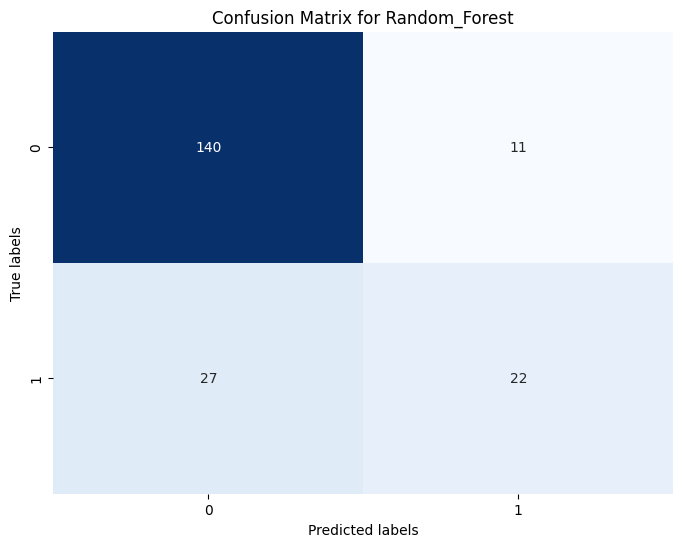

In [10]:
cm_rf_base = rf_model.plot_confusion_matrix()

## Results with Tuning

In [11]:
rf_model.finetune()

[I 2024-04-01 17:36:52,010] A new study created in memory with name: no-name-0fe5063c-9ce6-41e8-acb8-90aa6f5b3ace
[I 2024-04-01 17:36:52,088] Trial 0 finished with value: 0.8323718068014044 and parameters: {'n_estimators': 22, 'max_depth': 8, 'criterion': 'gini'}. Best is trial 0 with value: 0.8323718068014044.
[I 2024-04-01 17:36:52,128] Trial 1 finished with value: 0.8231907792707287 and parameters: {'n_estimators': 10, 'max_depth': 8, 'criterion': 'gini'}. Best is trial 0 with value: 0.8323718068014044.
[I 2024-04-01 17:36:52,181] Trial 2 finished with value: 0.82490291683726 and parameters: {'n_estimators': 14, 'max_depth': 10, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.8323718068014044.
[I 2024-04-01 17:36:52,235] Trial 3 finished with value: 0.8273594620414139 and parameters: {'n_estimators': 18, 'max_depth': 6, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.8323718068014044.
[I 2024-04-01 17:36:52,304] Trial 4 finished with value: 0.834832487603545 and para

(0.8455933135651751, {'n_estimators': 26, 'max_depth': 5, 'criterion': 'gini'})

In [12]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.805,
 'precision': 0.5961538461538461,
 'recall': 0.6326530612244898,
 'f1_score': 0.6138613861386137}

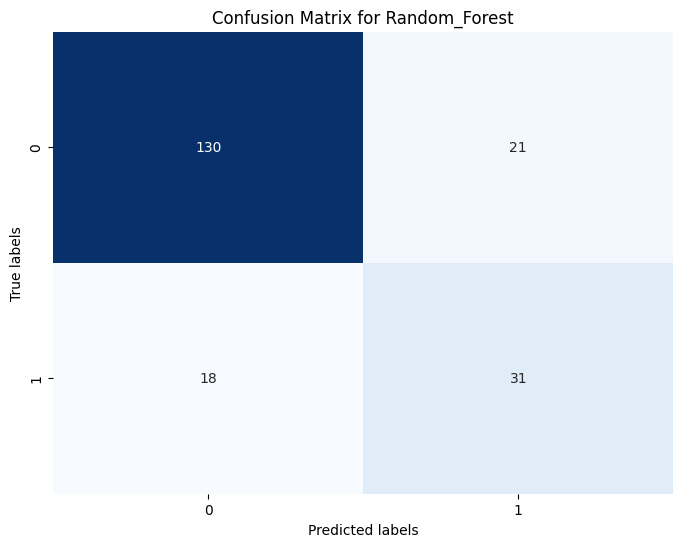

In [13]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

# XGBoost

## Dataset Creation

In [7]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = False,
    normalization = False,
    )

In [9]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]

In [77]:
# Format the data into categorical type

cate_cols = parameters.cate_cols

X_train_xgb[cate_cols] = X_train_xgb[cate_cols].astype("category")
X_test_xgb[cate_cols] = X_test_xgb[cate_cols].astype("category")

In [78]:
X_train_xgb.dtypes

months_as_customer                                 int64
age                                                int64
policy_state                                    category
policy_deductable                                  int64
policy_annual_premium                            float64
umbrella_limit                                     int64
insured_sex                                     category
insured_education_level                         category
insured_occupation                              category
insured_hobbies                                 category
insured_relationship                            category
capital-gains                                      int64
capital-loss                                       int64
incident_year                                      int64
incident_type                                   category
collision_type                                  category
incident_severity                               category
authorities_contacted          

## Model Creation

In [79]:
xgb_static_params = {
    "enable_categorical": True # Enable categorical data
}

In [80]:
from xgboost import XGBClassifier
xgb_model = models.IndividualModel(
    model_func = XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## Results with no tuning

In [81]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.81,
 'precision': 0.6037735849056604,
 'recall': 0.6530612244897959,
 'f1_score': 0.6274509803921567}

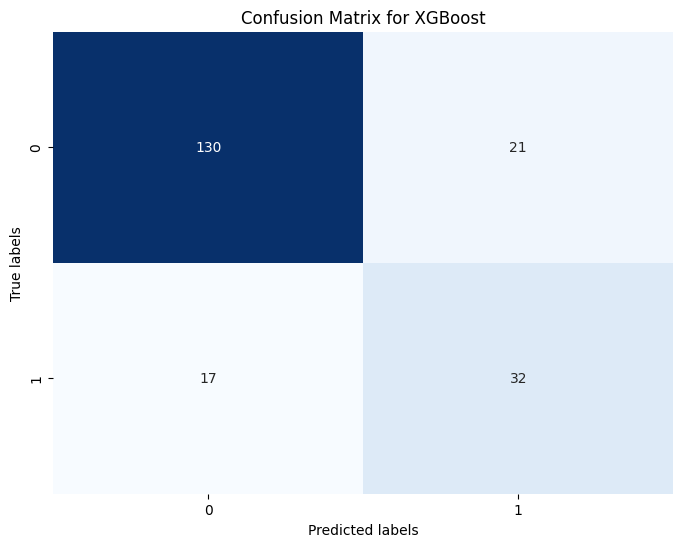

In [82]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

## Results with Tuning

In [83]:
xgb_model.finetune()

[I 2024-04-01 19:11:11,135] A new study created in memory with name: no-name-89d1e60c-4286-49ab-aad0-0f8746087aa1
[I 2024-04-01 19:11:11,441] Trial 0 finished with value: 0.8779045643153527 and parameters: {'n_estimators': 129, 'max_depth': 17, 'learning_rate': 0.15000000000000002, 'subsample': 0.55, 'colsample_bytree': 0.30000000000000004, 'gamma': 3.5, 'reg_alpha': 3.9000000000000004, 'reg_lambda': 3.5}. Best is trial 0 with value: 0.8779045643153527.
[I 2024-04-01 19:11:11,587] Trial 1 finished with value: 0.8165041493775934 and parameters: {'n_estimators': 12, 'max_depth': 28, 'learning_rate': 0.39, 'subsample': 0.95, 'colsample_bytree': 0.2, 'gamma': 0.5, 'reg_alpha': 4.2, 'reg_lambda': 3.2}. Best is trial 0 with value: 0.8779045643153527.
[I 2024-04-01 19:11:12,114] Trial 2 finished with value: 0.8696058091286307 and parameters: {'n_estimators': 317, 'max_depth': 13, 'learning_rate': 0.29000000000000004, 'subsample': 0.2, 'colsample_bytree': 0.30000000000000004, 'gamma': 4.7, 're

(0.9003423236514523,
 {'n_estimators': 260,
  'max_depth': 13,
  'learning_rate': 0.09999999999999999,
  'subsample': 0.9000000000000001,
  'colsample_bytree': 0.35000000000000003,
  'gamma': 1.5,
  'reg_alpha': 0.30000000000000004,
  'reg_lambda': 3.1})

In [84]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.805,
 'precision': 0.6136363636363636,
 'recall': 0.5510204081632653,
 'f1_score': 0.5806451612903225}

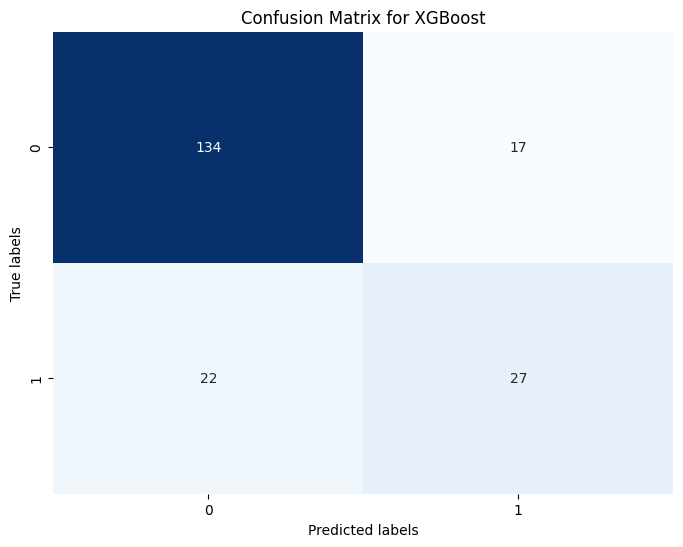

In [85]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

## Model Explanation

### SHAP Values

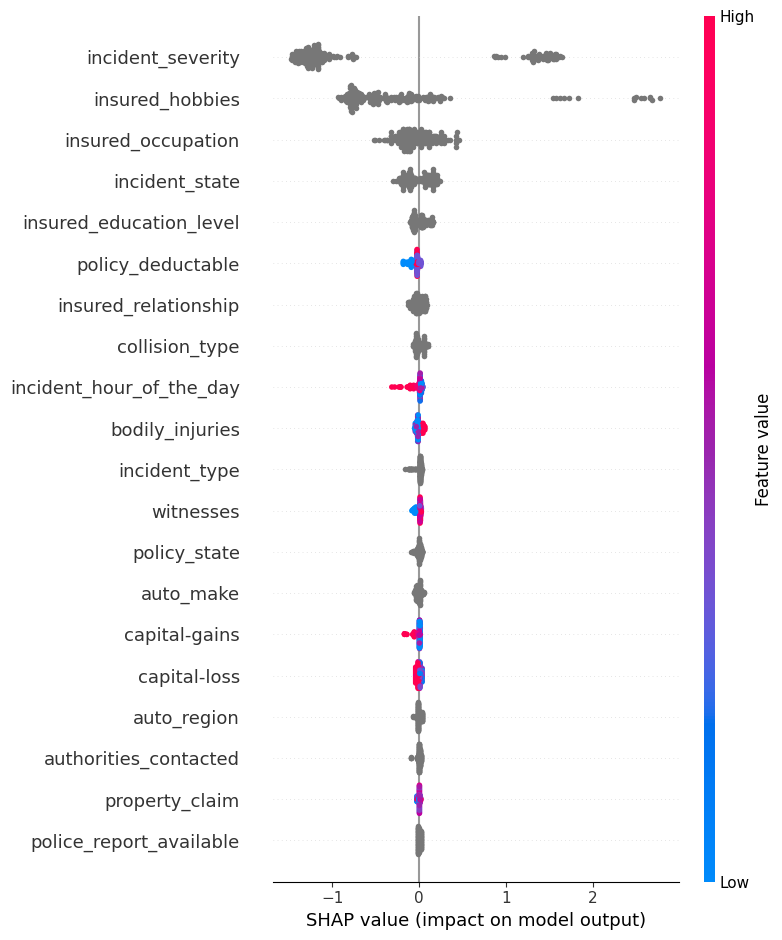

In [30]:
xgb_model.shap_explanation(chosen_index=None)

### XGBoost Native Explanation

<Axes: title={'center': 'Tuned XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

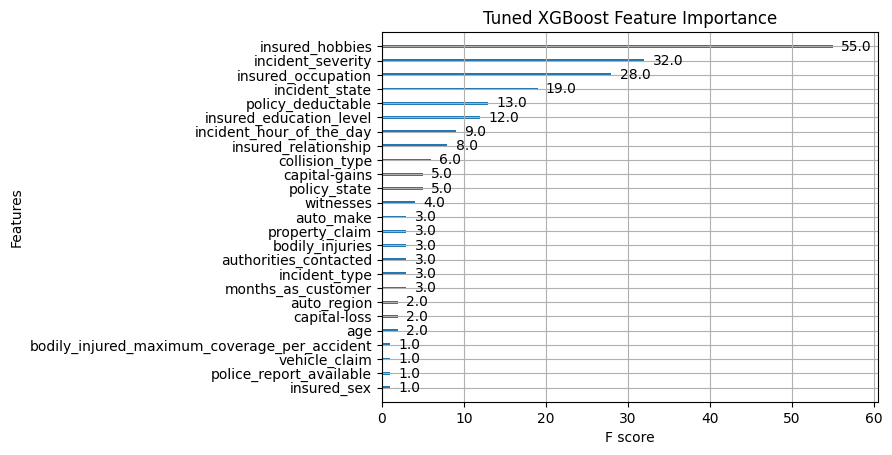

In [31]:
import xgboost as xgb

xgb.plot_importance(xgb_model.model, title="Tuned XGBoost Feature Importance")